In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
results_dir = "../results/"
res_filename = results_dir + "task_results_final.csv"
zero_shot_filename = results_dir + "zero_shot_task_results_added25102023.csv"
logistic_filename = results_dir + "results_logistic_regression.csv"
n_classes = 2

In [3]:
res = pd.read_csv(res_filename)
res0 = pd.read_csv(zero_shot_filename)
res_log = pd.read_csv(logistic_filename)

In [4]:
res.columns

Index(['seed_id', 'single_experiment_id', 'task', 'task_name', 'technique',
       'technique_name', 'model', 'model_name', 'n_train', 'balanced_train',
       'balanced_eval', 'template', 'template_name', 'seed', 'eval_set',
       'eval_true', 'eval_pred', 'f1', 'acc', 'prec', 'recall',
       'train_runtime', 'datetime'],
      dtype='object')

In [5]:
res0.columns

Index(['task', 'technique', 'model', 'test_set', 'train_runtime', 'n_train',
       'n_eval', 'eval_set', 'balanced_train', 'datetime', 'eval_true',
       'eval_pred', 'eval_cm (tn, fp, fn, tp)', 'n_used', 'zero_shot_prompt',
       'acc', 'f1', 'prec', 'recall'],
      dtype='object')

In [6]:
res_log.columns

Index(['Unnamed: 0', 'task', 'technique', 'model', 'train_runtime', 'n_train',
       'n_eval', 'eval_set', 'balanced_train', 'balanced_eval', 'datetime',
       'eval_true', 'eval_pred', 'seed', 'f1-macro'],
      dtype='object')

In [7]:
res0["seed"] = 0
res0 = res0.rename(columns={"zero_shot_prompt": "template", "test_set": "balanced_eval"})
res0.task = res0.task.replace({"binary_abuse": "Binary Abuse", "binary_movie_sentiment": "Binary Movie Sentiment"})
res0.balanced_eval = res0.balanced_eval.replace({"balanced": True, "unbalanced": False})

In [8]:
res_log.task = res_log.task.replace({"binary_abuse": "Binary Abuse", "binary_movie_sentiment": "Binary Movie Sentiment"})
res_log["template"] = np.nan

In [9]:
cols = ["task", "technique", "model", "balanced_train", "balanced_eval", "eval_true", "eval_pred", "seed", "template"]

filtered_res = res.loc[res.n_train==1024, cols]
filtered_res0 = res0.loc[res0.n_train==0, cols]
filtered_res_log = res_log.loc[res_log.n_train==1024, cols]

final_res = pd.concat([filtered_res, filtered_res0, filtered_res_log])

final_res.eval_true = final_res.eval_true.apply(lambda x: [int(s) for s in list(x) if s in ["0", "1"]])
final_res.eval_pred = final_res.eval_pred.apply(lambda x: [int(s) for s in list(x) if s in ["0", "1"]])

In [10]:
def choose_preds(balanced_eval, eval_pred):
    int_half = int(len(eval_pred)/2)
    half1 = eval_pred[:int_half]
    half2 = eval_pred[int_half:]

    if balanced_eval:
        return half2
    else:
        return half1

idx_to_change = ~ final_res.apply(lambda x: len(x.eval_true) == len(x.eval_pred), axis=1)
final_res.loc[idx_to_change, "eval_pred"] = final_res[idx_to_change].apply(
    lambda x: choose_preds(x.balanced_eval, x.eval_pred), 
    axis=1
    )

In [11]:
idx_to_change = ~ final_res.apply(lambda x: len(x.eval_true) == len(x.eval_pred), axis=1)
sum(idx_to_change)

0

In [12]:
final_res

,task,technique,model,balanced_train,balanced_eval,eval_true,eval_pred,seed,template
18,Binary Abuse,Prompt_Engineering,gpt2,False,False,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,"{""placeholder"":""text_a""} It was? {""mask""}"
19,Binary Abuse,Prompt_Engineering,gpt2,False,False,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,"{""placeholder"":""text_a""} It was? {""mask""}"
20,Binary Abuse,Prompt_Engineering,gpt2,False,False,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"{""placeholder"":""text_a""} It was? {""mask""}"
45,Binary Abuse,Prompt_Engineering,distilbert,False,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,"{""placeholder"":""text_a""} Is this text abusive?..."
46,Binary Abuse,Prompt_Engineering,distilbert,False,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2.0,"{""placeholder"":""text_a""} Is this text abusive?..."
...,...,...,...,...,...,...,...,...,...
475,Binary Movie Sentiment,logistic_regression,logistic_regression,True,True,"[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",5.0,NaN
476,Binary Movie Sentiment,logistic_regression,logistic_regression,True,True,"[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",6.0,NaN
477,Binary Movie Sentiment,logistic_regression,logistic_regression,True,True,"[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",7.0,NaN
478,Binary Movie Sentiment,logistic_regression,logistic_regression,True,True,"[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",8.0,NaN


In [13]:
tasks = final_res.task.unique()
techniques = final_res.technique.unique()

In [14]:
final_res.loc[final_res.technique=="Transfer_Learning"].model.unique()

array(['microsoft/deberta-v3-base', 'distilbert-base-cased'], dtype=object)

In [15]:
final_res.loc[final_res.technique=="Prompt_Engineering"].model.unique()

array(['gpt2', 'distilbert'], dtype=object)

In [16]:
final_res.loc[final_res.technique=="Naive_Bayes"].model.unique()

array(['NB'], dtype=object)

In [17]:
final_res.loc[final_res.technique=="logistic_regression"].model.unique()

array(['logistic_regression'], dtype=object)

In [18]:
dict_eval = {}

for task in tasks:
    dict_eval[task] = {}
    for tech in final_res.technique.unique():
        dict_eval[task][tech] = {}
        for model in final_res.loc[final_res.technique==tech].model.unique():
            dict_eval[task][tech][model] = {}
            for train in [False, True]:
                dict_eval[task][tech][model][str(train)] = {}
                for eval in [False, True]:
                    dict_eval[task][tech][model][str(train)][str(eval)] = {}

                    if "prompt_engineering" in tech.lower():
                        for template in final_res.loc[final_res.technique==tech].template.unique():
                            if template is not np.NaN:
                                dict_eval[task][tech][model][str(train)][str(eval)][template] = {}

                                df = final_res.loc[(final_res.task==task)
                                & (final_res.technique==tech)
                                & (final_res.model==model)
                                & (final_res.balanced_train==train)
                                & (final_res.template==template),
                                ["eval_true", "eval_pred"]
                                ]

                                dict_eval[task][tech][model][str(train)][str(eval)][template]["eval_pred"] = df.eval_pred.values
                                dict_eval[task][tech][model][str(train)][str(eval)][template]["eval_true"] = df.eval_true.values

                    else:
                        df = final_res.loc[(final_res.task==task)
                            & (final_res.technique==tech)
                            & (final_res.model==model)
                            & (final_res.balanced_train==train),
                            ["eval_true", "eval_pred"]
                        ]

                        dict_eval[task][tech][model][str(train)][str(eval)]["eval_pred"] = df.eval_pred.values
                        dict_eval[task][tech][model][str(train)][str(eval)]["eval_true"] = df.eval_true.values

In [19]:
dict_op = {}

for task in tasks:
    dict_op[task] = {}
    for tech in final_res.technique.unique():
        dict_op[task][tech] = {}
        for model in final_res.loc[final_res.technique==tech].model.unique():
            dict_op[task][tech][model] = {}
            for train in [False, True]:
                dict_op[task][tech][model][str(train)] = {}
                for eval in [False, True]:
                    dict_op[task][tech][model][str(train)][str(eval)] = {}

                    if "prompt_engineering" in tech.lower():
                        for template in final_res.loc[final_res.technique==tech].template.unique():
                            if template is not np.NaN:
                                dict_op[task][tech][model][str(train)][str(eval)][template] = {}

                                eval_pred = dict_eval[task][tech][model][str(train)][str(eval)][template]["eval_pred"]
                                eval_true = dict_eval[task][tech][model][str(train)][str(eval)][template]["eval_true"]

                                over_predictions = np.zeros((len(eval_pred), n_classes))
                                for seed in range(len(eval_pred)):
                                    predicted_labels = eval_pred[seed]
                                    ground_truths = eval_true[seed]

                                    total = len(predicted_labels)
                                    if len(predicted_labels) != len(ground_truths):
                                        print(task, tech, model , str(train), template)
                                    else:
                                        df = pd.DataFrame(data={'predictions': predicted_labels, 'ground_truth': ground_truths})
                                        over_predictions[seed, 0] = len(df.loc[(df.ground_truth==1) & (df.predictions==0)])*100/total
                                        over_predictions[seed, 1] = len(df.loc[(df.ground_truth==0) & (df.predictions==1)])*100/total

                                dict_op[task][tech][model][str(train)][str(eval)][template]["over_predictions"] = over_predictions

                    else:
                        df = final_res.loc[(final_res.task==task)
                            & (final_res.technique==tech)
                            & (final_res.model==model)
                            & (final_res.balanced_train==train),
                            ["eval_true", "eval_pred"]
                        ]

                        eval_pred = dict_eval[task][tech][model][str(train)][str(eval)]["eval_pred"]
                        eval_true = dict_eval[task][tech][model][str(train)][str(eval)]["eval_true"]

                        over_predictions = np.zeros((len(eval_pred), n_classes))
                        for seed in range(len(eval_pred)):
                            predicted_labels = eval_pred[seed]
                            ground_truths = eval_true[seed]

                            if len(predicted_labels) != len(ground_truths):
                                print(task, tech, model , str(train), str(eval))
                            total = len(predicted_labels)
                            df = pd.DataFrame(data={'predictions': predicted_labels, 'ground_truth': ground_truths})
                            over_predictions[seed, 0] = len(df.loc[(df.ground_truth==1) & (df.predictions==0)])*100/total
                            over_predictions[seed, 1] = len(df.loc[(df.ground_truth==0) & (df.predictions==1)])*100/total

                        dict_op[task][tech][model][str(train)][str(eval)]["over_predictions"] = over_predictions

In [21]:
task = "Binary Abuse"
tech = "zero_shot_prompt_engineering"
model = "gpt35"
train = "False"
eval = "False"

templates0 = list(dict_op[task][tech][model][train][eval].keys())
templates0_abuse = templates0[:3]
templates0_sentiment = templates0[3:]

templates_pe = list(final_res.loc[final_res.technique=="Prompt_Engineering"].template.unique())
templates_pe_abuse = templates_pe[:3]
templates_pe_sentiment = templates_pe[3:]

In [22]:
def title(train, eval):
    if train == "False":
        training = "unbalanced"
    else:
        training = "balanced"
    
    if eval == "False":
        testing = "unbalanced"
    else:
        testing = "balanced"

    return f"{training} training and {testing} test"

In [59]:
pairs = [
    ("zero_shot_prompt_engineering", "gpt3"),
    ("zero_shot_prompt_engineering", "gpt35"),
    ("zero_shot_prompt_engineering", "gpt4"),
    ("Prompt_Engineering", "distilbert"),
    ("Transfer_Learning", "distilbert-base-cased"),
    ("Weak_Supervision", "LabelModel"),
    ("Naive_Bayes", "NB"),
    ("logistic_regression", "logistic_regression")
]

ylabels = [
    "Zero-shot PE\nGPT-3",
    "Zero-shot PE\nGPT-3.5",
    "Zero-shot PE\nGPT-4.0",
    "Prompt\nEngineering",
    "Transfer\nLearning",
    "Weak\nSupervision",
    "Naive\nBayes",
    "Logistic\nRegression"
    ]
    
width = 0.3  # the width of the bars
padding = 0.01

x = range(1,len(ylabels)+1)

colors = ["deepskyblue", "r", "g", "orange", "pink", "purple", "gray", "brown"]
letters = ["(a) ", "(b) ", "(c) "]

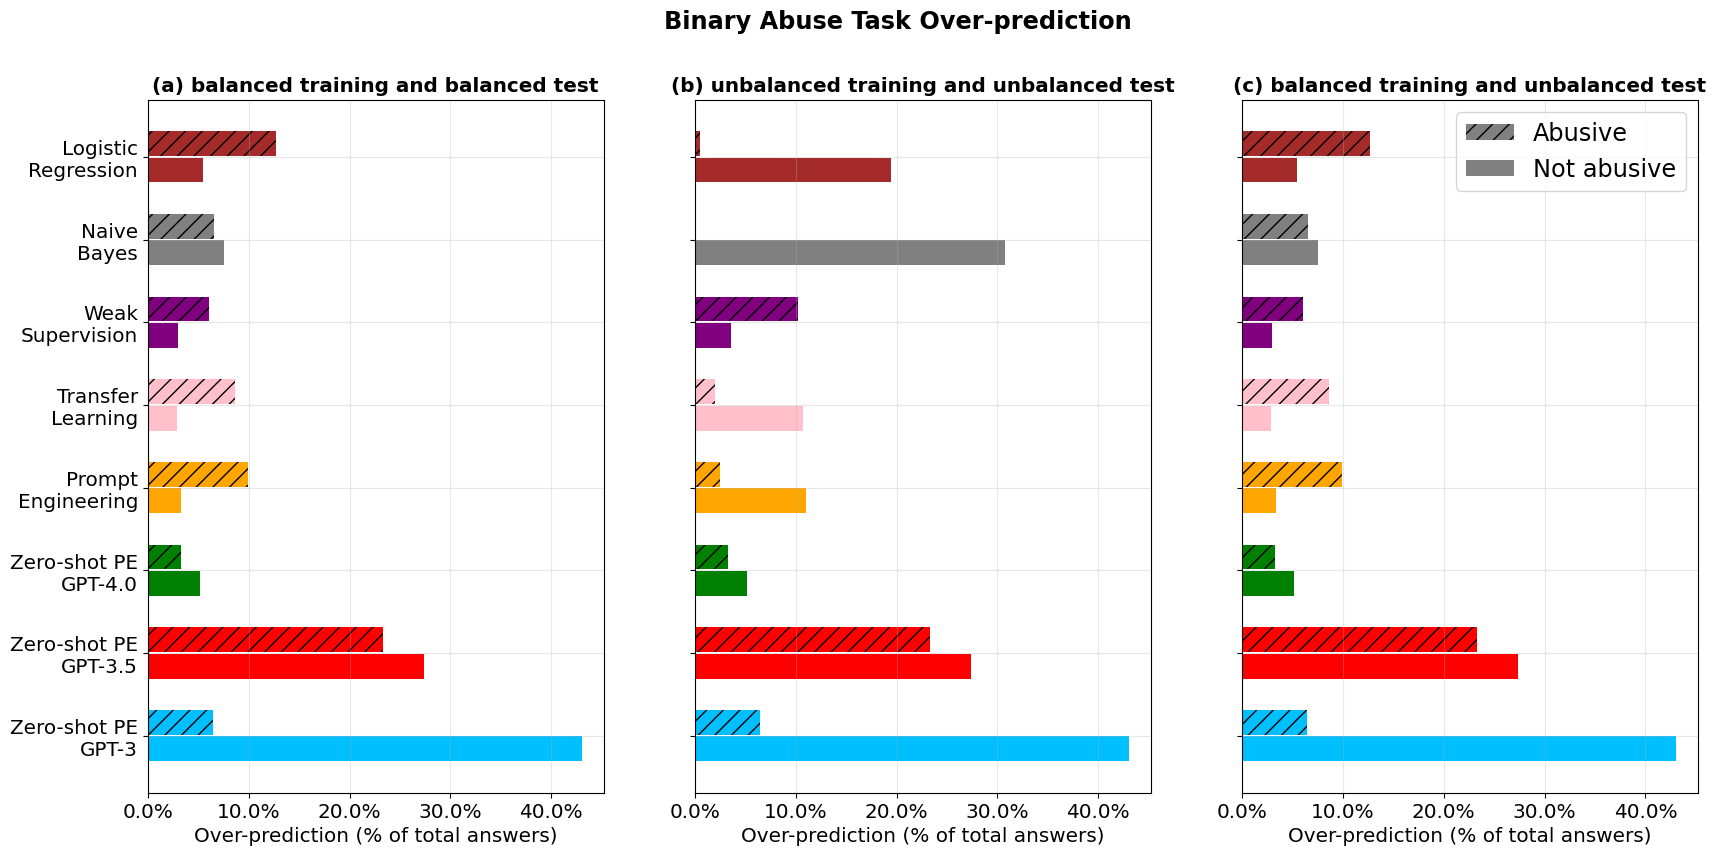

In [67]:
task = "Binary Abuse"

template_pe =  templates_pe_abuse[-1]
template_0 = templates0_abuse[-1]

fig, ax = plt.subplots(1, 3, figsize=(20, 9), sharey=True)

fig.suptitle(f"{task} Task Over-prediction", fontweight="semibold", size="xx-large")
ax[0].set_yticks(x, ylabels, size='x-large')

for j, pair in enumerate([("True", "True"), ("False", "False"), ("True", "False")]):
    
    train, eval = pair

    op_means_dict = {
        "True": [],
        "False": []
    }

    for (tech, model) in pairs:
        if tech.lower() == "prompt_engineering":
            op = dict_op[task][tech][model][train][eval][template_pe]["over_predictions"]
        elif tech == "zero_shot_prompt_engineering":
            op = dict_op[task][tech][model]["False"][eval][template_0]["over_predictions"]
        else:
            op = dict_op[task][tech][model][train][eval]["over_predictions"]

        op_means_dict["True"].append(op[:, 1].mean())
        op_means_dict["False"].append(op[:, 0].mean())

    for i in range(len(op_means_dict["False"])):

        if i == len(op_means_dict["False"])-2:
            label_true = "Abusive"
            label_false = "Not abusive"
        else:
            label_true = None
            label_false = None

        ax[j].barh(x[i]+width/2+padding, op_means_dict["True"][i], width, color=colors[i], label=label_true, hatch="//")
        ax[j].barh(x[i]-width/2-padding, op_means_dict["False"][i], width, color=colors[i], label=label_false)
    
    ax[j].set_title(letters[j] + title(train, eval), fontweight="semibold", size='x-large')
    ax[j].set_xlabel('Over-prediction (% of total answers)', size='x-large')
    ax[j].xaxis.set_major_formatter(mtick.PercentFormatter())
    ax[j].xaxis.set_tick_params(labelsize='x-large')
    ax[j].grid(alpha=0.3)

    
ax[2].legend(loc='upper right', ncols=1, fontsize="xx-large")
    
plt.savefig("overprediction_binary_abuse.png", format="png", bbox_inches="tight")
        

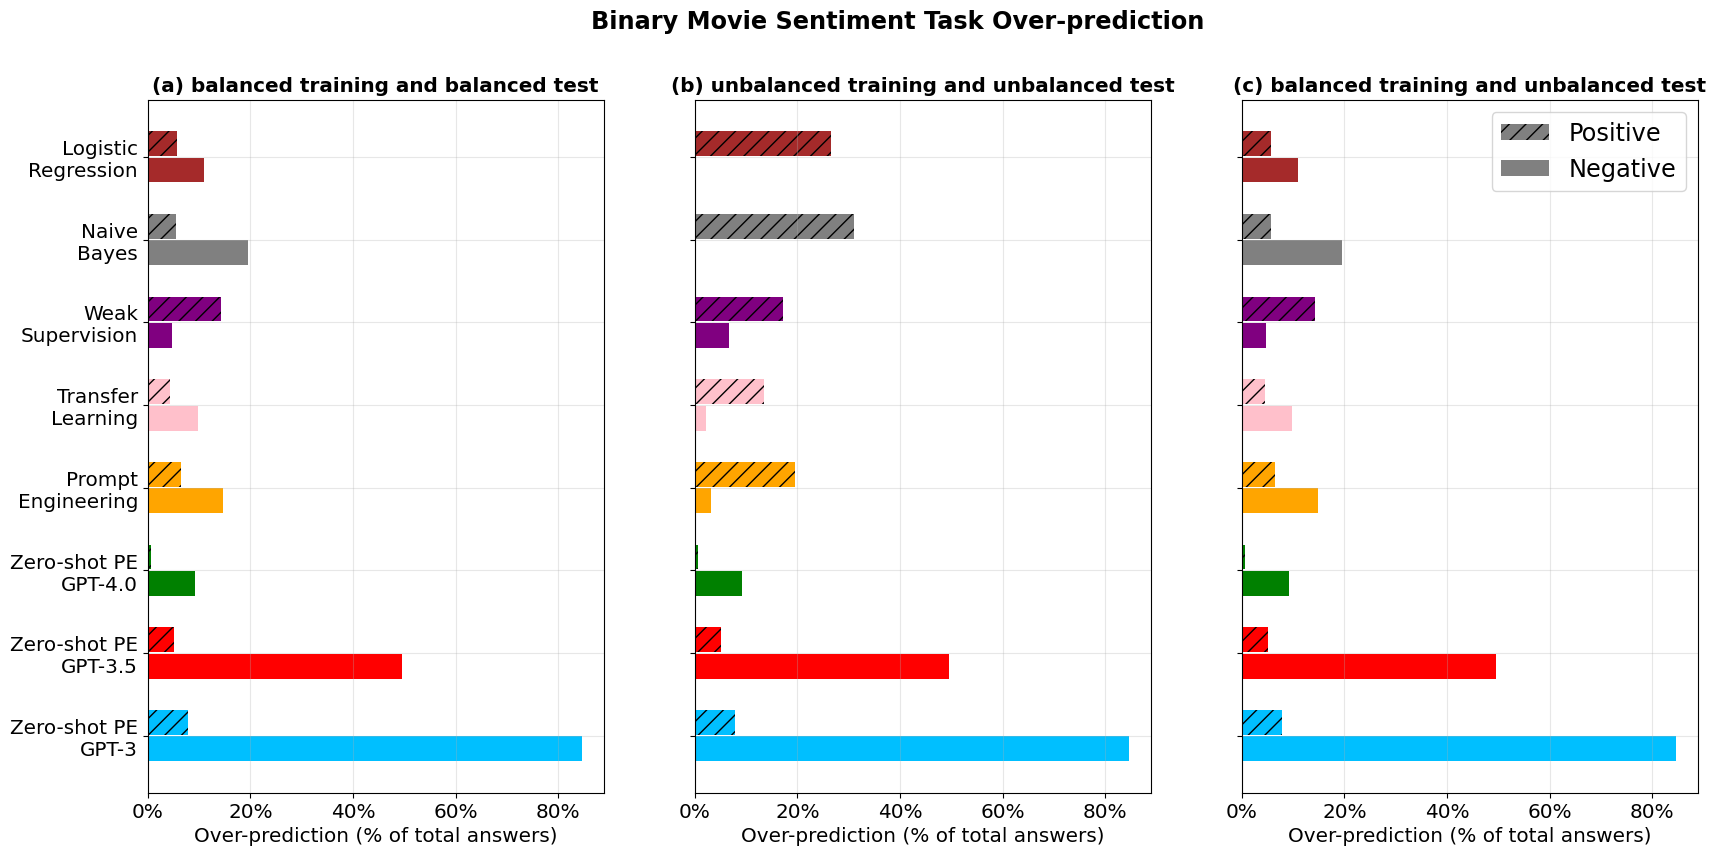

In [66]:


task = "Binary Movie Sentiment"

template_pe =  templates_pe_sentiment[-1]
template_0 = templates0_sentiment[-1]

fig, ax = plt.subplots(1, 3, figsize=(20, 9), sharey=True)

fig.suptitle(f"{task} Task Over-prediction", fontweight="semibold", size="xx-large")
ax[0].set_yticks(x, ylabels, size='x-large')

for j, pair in enumerate([("True", "True"), ("False", "False"), ("True", "False")]):
    
    train, eval = pair

    op_means_dict = {
        "True": [],
        "False": []
    }

    for (tech, model) in pairs:
        if tech.lower() == "prompt_engineering":
            op = dict_op[task][tech][model][train][eval][template_pe]["over_predictions"]
        elif tech == "zero_shot_prompt_engineering":
            op = dict_op[task][tech][model]["False"][eval][template_0]["over_predictions"]
        else:
            op = dict_op[task][tech][model][train][eval]["over_predictions"]

        op_means_dict["True"].append(op[:, 1].mean())
        op_means_dict["False"].append(op[:, 0].mean())

    for i in range(len(op_means_dict["False"])):

        if i == len(op_means_dict["False"])-2:
            label_true = "Positive"
            label_false = "Negative"
        else:
            label_true = None
            label_false = None

        ax[j].barh(x[i]+width/2+padding, op_means_dict["True"][i], width, color=colors[i], label=label_true, hatch="//")
        ax[j].barh(x[i]-width/2-padding, op_means_dict["False"][i], width, color=colors[i], label=label_false)

    ax[j].set_title(letters[j] + title(train, eval), fontweight="semibold", size='x-large')
    ax[j].set_xlabel('Over-prediction (% of total answers)', size='x-large')
    ax[j].xaxis.set_major_formatter(mtick.PercentFormatter())
    ax[j].xaxis.set_tick_params(labelsize='x-large')
    ax[j].grid(alpha=0.3)

ax[2].legend(loc='upper right', ncols=1, fontsize="xx-large")

plt.savefig("overprediction_movie_sentiment.png", format="png", bbox_inches="tight")
    
        